# Statistics

<i>Notes from https://arxiv.org/pdf/1503.07622.pdf</i>


## Definitions

Roman letters ($x$, ...) - Observables <br>
Greek letters ($\mu$, ...) - Model parameters <br>
Dataset - $D = \{x_{1}, . . . , x_{n}\}$ <br>
$e$ - Event <br>
$c$ - Channel <br>
$\hat{\alpha}$ - Estimator for $\alpha$  <br>
Test statistic - A function that maps the data to a single real number: $T(D) \rightarrow {\rm I\!R}$  <br>


Type-I error, $α$ - The probability the null hypothesis will be rejected when it is true. This is equivalent to the probability under the null hypothesis that the data will not be found in this acceptance region, ie. $α = P(T(D) ≥ k_{α}|H_{0})$. <br>
Type-II error, $β$ - The probability the null hypothesis will be accepted when the alternate is true. The probability is given by $β = P(T(D) < k_{α}|H_{1})$. <br>
Power - $1 − β$ <br>
$α_{poi}$ - Parameters of interest. <br>
$α_{nuis}$ - Nuisance parameters. <br>
Coverage - The probability that the interval will contain (cover) the parameter $α$ when it is true, ${\rm coverage}(α) = P(α ∈ I | α)$


### Poisson model

If we consider the
events as independently drawn from the same underlying distribution, then clearly the probability density
is just a product of densities for each event. However, if we have a prediction that the total number of
events expected, call it $\nu$, then we should also include the overall Poisson probability for observing $n$
events given $\nu$ expected. Thus, we arrive at what statisticians call a marked Poisson model,


$$f(D|\nu, \alpha) = Pois(n|\nu)
\prod_{e=1}^{n}
f(x_{e}|\alpha)$$



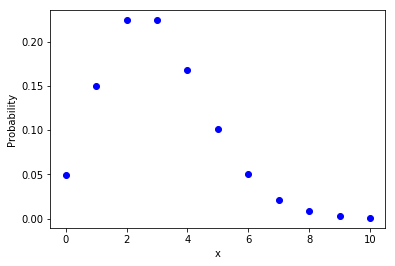

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt

def poisson(k, mu):
    return math.exp(-mu) * mu**(k)/math.factorial(k)
    
xMin = 0
xMax = 10
N    = xMax - xMin + 1
mu   = 3

x = np.linspace(xMin, xMax, N)
y = [poisson(x_i, mu) for x_i in x]
plt.plot(x,y,'bo')
plt.xlabel('x')
plt.ylabel('Probability')
plt.show()

### Likelihood function

The likelihood function $L(\alpha)$ is numerically equivalent to $f(x|\alpha)$ with $x$ fixed – or $f(D|α)$ with
$D$ fixed. <br>

$$−\ln L(\alpha) = \{\nu(\alpha) − n \ln \nu(\alpha)\}
− \sum_{e=1}^{n} \ln f(x_{e}) + \{\ln n!\}$$

First term is the 'extended term', last term is a constant.

### Bayes' theorem
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

To interpret an example measurement of $n_{CR}$ as implying a probability distribution for $\nu_{B}$
we would write:
$$\pi(\nu_B{}|n_{CR}) \propto f(n_{CR}|\nu_{B})\eta(\nu_{B})$$
Where $\pi(\nu_B{}|n_{CR})$ is the <it>posterior</it> probability density, $f(n_{CR}|\nu_{B})$ is the likelihood function, and $\eta(\nu_{B})$ is the <it>prior</it> probability.

### Measurement as parameter estimation

The sample mean $\overline{x} = \sum_{e=1}^{n} x_{e}/n$ is an estimate for
the mean, $\mu$, of a Gaussian probability density $f(x|\mu, \sigma) = Gauss(x|\mu, \sigma)$. More generally, an estimator
$\hat{\alpha}(D)$ is some function of the data and its value is used to estimate the true value of some parameter $\alpha$. <br>

The bias of an estimator is defined as $B(\hat{\alpha}) = E[\hat{\alpha}] − \alpha$, where $E$ means the expectation value of $E[\hat{\alpha}] = \int\hat{α}(x)f(x)dx$ or the probability-weighted average. 

 The variance of an estimator is defined as: $var[\hat{\alpha}] = E[(\alpha − E[\hat{\alpha}])^{2}]$. Clearly one would like
an estimator with the minimum variance. 

Unfortunately, there is a tradeoff between bias and variance. Physicists tend to be allergic to biased estimators, and within the class of unbiased estimators, there is a well defined minimum variance bound referred to as the Cramér-Rao bound.

### Maximum likelihood estimator

The most widely used estimator in physics is the maximum likelihood estimator (MLE). It is
defined as the value of $\alpha$ which maximizes the likelihood function $L(\alpha)$. Equivalently this value, $\hat{\alpha}$,
maximizes $\log L(\alpha)$ and minimizes $− \log L(\alpha)$.

When one has a multi-parameter likelihood function $L(α)$, then the situation is slightly more
complicated. The maximum likelihood estimate for the full parameter list, $\hat{α}$, is clearly defined. The
various components $\hat{α}_{p}$ are referred to as the unconditional maximum likelihood estimates. In the physics
jargon, one says all the parameters are ‘floating’. 

One can also ask about maximum likelihood estimate
of $α_{p}$ is with some other parameters $α_{o}$ fixed; this is called the conditional maximum likelihood estimate
and is denoted $\hat{\hat{α}}_{p}(α_{o})$. These are important quantities for defining the profile likelihood ratio.

The concept of variance of the estimates is also generalized to the covariance matrix $cov[α_{p}, α_{p'}] = E[(\hat{α}_{p} − α_{p})(\hat{α}_{p'} − α_{p'})]$ and is often denoted Σ_{pp'}. Note, the diagonal elements of the covariance matrix are the same as the variance for the individual parameters, ie.
$cov[α_{p}, α_{p}] = var[α_{p}]$.

In the case of a Poisson model $Pois(n|\nu)$ the maximum likelihood estimate of $\nu$ is simply $\hat{\nu} = n$.
Thus, it follows that the variance of the estimator is $var[\hat{\nu}] = var[n] = \nu$.

When the number of events is large, the distribution of maximum likelihood estimates approaches a Gaussian or normal distribution. For small samples this isn’t the case, but this limiting distribution is often referred to as an asymptotic distribution. Furthermore, under most circumstances in particle physics, the maximum likelihood estimate
approaches the minimum variance or Cramér-Rao bound. In particular, the inverse of the covariance matrix for the estimates is asymptotically given by:

$$Σ^{−1}_{pp'}(α) = E\left[ \frac{∂^{2} \log f(x|α)}{∂α_{p}∂_{p'}}| α \right]$$, 

where I have written explicitly that the expectation, and thus the covariance matrix itself, depend on the
true value α. The right side is called the (expected) Fisher information matrix. The expectation involves an integral over the observables. Since that integral is difficult to perform
in general, one often uses the observed Fisher information matrix to approximate the variance of the
estimator by simply taking the matrix of second derivatives based on the observed data


$$\tilde{Σ}^{−1}_{pp'}(α) = \frac{∂^{2} \log L(α)}{∂α_{p}∂_{p'}}$$.

## Hypothesis testing

Discovery is formulated in terms of a hypothesis test where the background-only hypothesis plays the role of the null hypothesis and the signal-plusbackground hypothesis plays the roll of the alternative. Roughly speaking, the claim of discovery is a
statement that the data are incompatible with the background-only hypothesis.

Consider the simplest scenario where one is counting events in the signal region, nSR and expects $\nu_{B}$ events from background and $\nu_{S}$ events from the putative signal. Then we have the following hypotheses:


| symbol  | statistical name      | physics name          | probability model                |
|---------|-----------------------|-----------------------|----------------------------------|
| $H_{0}$ | null hypothesis       |background-only        | $Pois(n_{SR}|\nu_{B})$           |
| $H_{1}$ | alternate hypothesis  |signal-plus-background | $Pois(n_{SR}|\nu_{S} + \nu_{B})$ |


In this simple example it’s fairly obvious that evidence for a signal shows up as an excess of events and
a reasonable way to quantify the compatibility of the observed data $n^{0}_{CR}$ and the null hypothesis is to
calculate the probability that the background-only would produce at least this many events; the $p$-value

$$p =
\sum^{∞}_{n=n^{0}_{SR}} Pois(n| \nu_{B})$$

If this $p$-value is very small, then one might choose to reject the null hypothesis. Note, the $p$-value is not to be interpreted as the probability of the null hypothesis given the data – that is a manifestly Bayesian statement. Instead, the $p$-value is a statement about the probability to have obtained data with a certain property assuming the null hypothesis.

A function that maps the data to a single real number is called a test statistic: $T(D) \rightarrow {\rm I\!R}$.

### Neyman and Pearson

Neyman and Pearson provided a framework for hypothesis testing that addresses the choice of
the test statistic. This setup treats the null and the alternate hypotheses in an asymmetric way. 

First, one defines an acceptance region in terms of a test statistic, such that if $T(D) < k_{α}$ one accepts the
null hypothesis. One can think of the $T(D) = k_{α}$ as defining a contour in the space of the data, which
is the boundary of this acceptance region. 

Next, one defines the size of the test, $α$, as the probability the null hypothesis will be rejected when it is true 
(a so-called Type-I error). This is equivalent to the probability under the null hypothesis that the data will not be 
found in this acceptance region, ie.
$α = P(T(D) ≥ k_{α}|H_{0})$. Note, it is now clear why there is a subscript on $k_{α}$, since the contour level is
related to the size of the test. 

In contrast, if one accepts the null hypothesis when the alternate is true,
it is called a Type-II error. The probability to commit a Type-II error is denoted as $β$ and it is given by
$β = P(T(D) < k_{α}|H_{1})$. One calls $1 − β$ the power of the test. 

With these definitions in place, one looks for a test statistic that maximizes the power of the test for a fixed test size.
In the case of two simple hypotheses (probability models without any parameters), the test statistic leading to the most powerful test is given by the likelihood ratio: 
$$T_{NP}(D) = \frac{f(D|H_{1})}{f(D|H_{0})}$$
this result is referred to as the Neyman-Pearson lemma.

Unfortunately, there is no equivalent to the Neyman-Pearson lemma for models with several free parameters – so called, composite
models. Nevertheless, there is a natural generalization based on the profile likelihood ratio.

The test statistic $T$ is a real-valued function of the data, then any particular
probability model $f_{tot}(D|α)$ implies a distribution for the test statistic $f(T|α)$. Note, the distribution for
the test statistic depends on the value of $α$.

Once one has the distribution, then one can calculate the p-value is given by
$$p(α) = \int^{∞}_{T_{0}} f(T|α)dT = \int f(D|α) θ(T(D) − T_{0}) dD = P(T ≥ T_{0}|\alpha)$$

where $T_{0}$ is the value of the test statistic based on the observed data and $θ$ is the Heaviside function.


It is natural to say that one should not reject the null hypothesis if the $p$-value is larger than the size of the test for any value of the nuisance parameters. Thus, in a frequentist approach one should either present $p$-value explicitly as a function of $α_{nuis}$ or take its maximal (or supremum) value:

$$p_{sup}(α_{poi}) = \underset{α_{nuis}}{\rm sup} \space  p(α_{nuis})$$


In most sciences conventional choices of the size of test are 10%, 5%, or 1%. In particle physics, our conventional threshold for discovery is the infamous 5σ criterion – which is a conventional way to refer to $α = 2.87 \times 10^{-7}$.

### Excluded and allowed regions as confidence intervals

Often we consider a new physics model that is parametrized by theoretical parameters, to which we ask what values of these theoretical parameters are allowed or excluded given available data.

In a frequentist setting, these allowed regions are called confidence intervals or confidence regions,
and the parameter points outside them are considered excluded. These are associated with a confidence interval
is a confidence level, i.e. the 95% and 68% confidence level. If we repeat the
experiments and obtain different data, then these confidence intervals will change. It is useful to think of
the confidence intervals as being random in the same way the data are random. The defining property of
a 95% confidence interval is that it covers the true value 95% of the time.

The procedure for building confidence intervals is called the Neyman Construction, and it is based on ‘inverting’ a
series of hypothesis tests.  In particular, for each value of $α$ in the parameter
space, one performs a hypothesis test based on some test statistic where the null hypothesis is $α$. 

Note, that in this context, the null hypothesis is changing for each test and generally is not the background only.
If one wants a 95% confidence interval, then one constructs a series of hypothesis test with a size
of 5%. The confidence interval $I(D)$ is constructed by taking the set of parameter points where the null
hypothesis is accepted.
$$I(D) = {α| P(T(D) > k_{α} | α) < α} $$
where the final $α$ and the subscript $k_{α}$ refer to the size of the test. Since a hypothesis test with a size
of 5% should accept the null hypothesis 95% of the time if it is true, confidence intervals constructed in
this way satisfy the defining property.

This same property is usually formulated in terms of coverage. Coverage is the probability that the interval will contain (cover) the parameter $α$ when it is true, 

$${\rm coverage}(α) = P(α ∈ I | α)$$

Intervals produced using the Neyman Construction procedure are said to “cover by construction”; however, one can
consider alternative procedures that may either under-cover or over-cover. Undercoverage means that
$P(α ∈ I | α)$ is smaller than desired and over-coverage means that $P(α ∈ I | α)$ is larger than desired.
Note that in general coverage depends on the assumed true value $α$.


Since one typically is only interested in forming confidence intervals on the parameters of interest,
then one could use the supremum $p$-value. This procedure ensures that the coverage is at least
the desired level, though for some values of α it may over-cover (perhaps significantly). This procedure,
which I call the ‘full construction’, is also computationally very intensive when $α$ has many parameters
as it require performing many hypothesis tests. In the naive approach where each αp is scanned in a
regular grid, the number of parameter points tested grows exponentially in the number of parameters.

There is an alternative approach, which I call the ‘profile construction’ and which statisticians call
an ‘hybrid resampling technique’ that is approximate to the full construction, but typically has
good coverage properties. Regions are the ones that satisfy $T(D) < k_{α}$. Once one has the
confidence belt, then one can immediately find the confidence interval for a particular measurement of $x$
simply by taking drawing a vertical line for the measured value of $x$ and finding the intersection with the
confidence belt. For more complicated models with many parameters the confidence belt will have one axis for the test statistic and one axis for each model parameter.

Note, a 95% confidence interval does not mean that there is a 95% chance that the true value of the
parameter is inside the interval – that is a manifestly Bayesian statement. One can produce a Bayesian
credible interval with that interpretation; however, that requires a prior probability distribution over the
parameters. Similarly, for any fixed interval I one can compute the Bayesian credibility of the interval:

$$P(α ∈ I | D) = \frac{\int_{I}f(D|α)\pi(α)dα}{\int f(D|α)\pi(α)dα} $$


## Student's t-distribution

tudent's t-distribution is any member of a family of continuous probability distributions that arises when estimating the mean of a normally distributed population in situations where the sample size is small and population standard deviation is unknown.


### Student's t-test

The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis.

Student's t-test is used for assessing the statistical significance of the difference between two sample means.

## Review of Important Concepts
https://onlinecourses.science.psu.edu/stat504/node/30/

Let $X_{1}, X_{2}, ..., X_{n}$ be a simple random sample from a probability distribution $f(x; θ)$.
- A parameter $θ$ of $f(x; θ)$ is a variable that is a characteristic of $f(x; θ)$.
- A statistic $T$ is any quantity that can be calculated from a sample; it's a function of $X_{1}, X_{2}, ..., X_{n}$ .
- An estimate $\hat{θ}$ for $θ$ is a single number that is a reasonable value for $θ$.
- An estimator $\hat{θ}$ for θ is a statistic that gives the formula for computing the estimate $\hat{θ}$.

The likelihood of the sample is the joint PDF (or PMF)

$L(θ)=f(x_{1},…,x_{n};θ)=\prod^{n}_{i=1} f(x_{i};θ)$

The maximum likelihood estimate (MLE) $\hat{θ}_{MLE}$ maximizes $L(θ)$.



Usually, MLE:

- is unbiased, E($\hat{θ}$) = $θ$
- is consistent, $\hat{θ}$ → $θ$, as n → ∞
- is efficient, has small SE($\hat{θ}$) as n → ∞
- is asymptotically normal, ($\hat{θ}$ − $θ$)SE($\hat{θ}$) ∼ N(0,1)

<b>Confidence intervals</b> measure uncertainty of an estimate. 

The asymptotic normality of the ML estimate, which gives the approximation:
$\hat{θ} ∼ N(θ, \hat{V}(θ))$


Observed Information: The quantity $−l′′(\hat{θ};x)$, where $l''$ denotes the second derivative with respect to $θ$, is called the “observed information,” and 
$1/\sqrt{−l′′(\hat{θ};x)}$ is an approximate standard error for $\hat{θ}$.
 
Fisher information: $I(θ) = −E[l′′(\hat{θ};x)]$

Approximate 95% interval: $\hat{θ} ± 1.96\sqrt{\hat{V}(\hat{θ})} = \hat{θ} ± 1.96\frac{1}{\sqrt{−l′′(\hat{θ};x)}} = \hat{θ} ± 1.96\frac{1}{\sqrt{I(\hat{θ})}}$


## Hypothesis testing

Three main tests: **Wald**, **Score** and **Likelihood ratio** tests

### p-value

The p-value is defined as the probability, under the null hypothesis, of obtaining a result equal to or more extreme than what was actually observed. 

### Wald test

$H_{0}: 0 = 0_{0}$

Reject $H_{0}$ with two-sided 95% C.I. if:
$$\frac{|\hat{θ} - θ_{0}|}{\sqrt{\hat{V}(\hat{θ})}} \geq 1.96$$


### Likelihood ratio

$H_{0}: 0 = 0_{0}$

$$2[l(\hat{θ}) - l(θ_{0})]$$

### Example: Binomial

Estimated variance: $$\hat{V}(\hat{\pi}) = \frac{\hat{\pi}(1 - \hat{\pi})}{n}$$

Leads to the Wald statistic:

$$Z^{2} = \left[  \frac{\hat{\pi} - \pi_{0}}{ 
\sqrt{ \frac{\hat{\pi}(1 - \hat{\pi})}{n}}
} \right]^{2}$$

Inverting the Wald statistic leads to the interval for $\pi$:

$$\hat{\pi} \pm z_{\alpha/2}\sqrt{\frac{\hat{\pi}(1 - \hat{\pi})}{n}}$$

Alternatively, the log-likelihood is: 

$$l(\pi) = y\log \pi + (n - y) \log\left(\frac{1 - \hat{\pi}}{1 - \pi_{0}} \right)$$

The likelihood-ratio is thus:

$$LR = 2\left[ y\log\left( \frac{\hat{\pi}}{\pi_{0}} \right) + (n - y) \log\left( \frac{1 - \hat{\pi}}{1 - \pi_{0}} \right) \right]$$

## Choice of test statistic

- If you believe your (within group) raw data are not normally distributed, use the Mann-Whitney _U-test_.
- If you believe you data are normally distributed, but you don't know the SD a-priori, use the _t-test_.
- If you believe your data are normally distributed and you know the SD a-priori, use the _z-test_.
- If your data are comprised of TWO variables, and BOTH variables are "categories" or "groups", then you should initially have a green light for Chi-Square. For binary choices.

### _t-test_

A t-test tests a null hypothesis about two means; most often, it tests the hypothesis that two means are equal, or that the difference between them is zero. The t-test allows you to say either "we can reject the null hypothesis of equal means at the 0.05 level" or "we have insufficient evidence to reject the null of equal means at the 0.05 level." 

The t-test is based on Student’s t-distribution. 

$$t = \frac{Z}{s} = \left(\bar{X} - \mu\right) / \left( \frac{s}{\sqrt{n}} \right)$$

Where $s$ is the sample standard deviation: 
$$s = \sqrt{\frac{1}{N - 1} \sum_{i=1}^{N}(x_{i} - \bar{x})^{2}}$$.

### _z-test_

A z-test is a statistical test used to determine whether two population means are different when the variances are known and the sample size is large. The test statistic is assumed to have a normal distribution, and nuisance parameters such as standard deviation should be known in order for an accurate z-test to be performed.

z-test relies on the assumption that the distribution of sample means is normal. 

$$z = \left(\bar{X} - \mu\right) / \left( \frac{\sigma}{\sqrt{n}} \right)$$

Where $\sigma$ is the sample standard deviation.


### _$\chi^{2}$-test_

A chi-square test tests a null hypothesis about the relationship between two variables. For example, you could test the hypothesis that men and women are equally likely to vote "Democratic," "Republican," "Other" or "not at all." A chi-square test allows you to say either "we can reject the null hypothesis of no relationship at the 0.05 level" or "we have insufficient evidence to reject the null at the 0.05 level." 

A statistic tested by a $\chi^{2}$ test has $\chi^{2}$ distribution.

# Poisson conditional probability

If $$X \sim Bin(n, p)$$ and $$Y \sim Bin(X, p)$$

I.e. the $n$ parameter of Y depends on output of X, then:

$$Y \sim Bin(n, p \cdot q)$$